In [1]:
#import libraries to use for my analysis and visualizations. Then read the file.
import numpy as np
import pandas as pd
import seaborn as sns
#Use for plotting
import matplotlib.pyplot as plt
 
#Used for confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

#Logistic Regression, calculate accuracy, measure precision and recall
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
import statsmodels.api as sm
 

#calculate z scores
from scipy import stats

%matplotlib inline
df=pd.read_csv('Churn_Clean209.csv')

In [2]:
df.shape

(10000, 50)

In [3]:
#Remove columns that are not relevent to the question being addressed in this analysis or are redundant
df=df.drop(columns=['CaseOrder','Customer_id','Interaction','UID', 'Lat','Lng','Population','TimeZone','State','Zip','City','County','Job','Children','Techie'])

In [4]:
df.shape

(10000, 35)

In [5]:
print (df.columns)

Index(['Area', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone',
       'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')


In [6]:
#(pandas.factorize¶)
#change categorical variables to numerical so that we can use them in them in the regression model
df.Area= pd.factorize(df.Area)[0]
df.Marital= pd.factorize(df.Marital)[0]
df.Gender= pd.factorize(df.Gender)[0]
df.Churn= pd.factorize(df.Churn)[0]
df.Contract= pd.factorize(df.Contract)[0]
df.Port_modem= pd.factorize(df.Port_modem)[0]
df.Tablet= pd.factorize(df.Tablet)[0]
df.InternetService= pd.factorize(df.InternetService)[0]
df.Phone= pd.factorize(df.Phone)[0]
df.Multiple= pd.factorize(df.Multiple)[0]
df.OnlineSecurity= pd.factorize(df.OnlineSecurity)[0]
df.OnlineBackup= pd.factorize(df.OnlineBackup)[0]
df.DeviceProtection= pd.factorize(df.DeviceProtection)[0]
df.TechSupport= pd.factorize(df.TechSupport)[0]
df.StreamingTV= pd.factorize(df.StreamingTV)[0]
df.StreamingMovies= pd.factorize(df.StreamingMovies)[0]
df.PaperlessBilling= pd.factorize(df.PaperlessBilling)[0]
df.PaymentMethod= pd.factorize(df.PaymentMethod)[0]

In [7]:
#Change all numeric variables to float which is less problamatic when completing the regression models
df = df.astype(float)

In [8]:
#Source (Train/Test Split + Fit/Predict/Accuracy)
# Create arrays for the features and the response variable
y = df['Churn'].values
x = df.drop('Churn', axis=1).values

# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8000, 34) (2000, 34) (8000,) (2000,)


In [9]:
#Source (Churn prediction fundamentals: Python)
# Make an instance of the model/initiate the model
logreg=LogisticRegression(random_state = 0,solver = 'liblinear') 
#Fits the data/learning how to predict churn from IVs
logreg.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [10]:
#Source (Churn prediction fundamentals: Python)
#Accuracy is the % of correctly predicted labels (churn yes and churn no)
y_train_pred=logreg.predict(x_train)
y_test_pred=logreg.predict(x_test)
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print('Training Accuracy:',round(train_acc,2))
print('Test Accuracy:',round(test_acc,4))

Training Accuracy: 0.84
Test Accuracy: 0.835


In [11]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df1

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
...,...,...
1995,1.0,1.0
1996,0.0,1.0
1997,0.0,0.0
1998,1.0,1.0


In [12]:
 print(y_test.sum(), y_test_pred.sum())

558.0 498.0


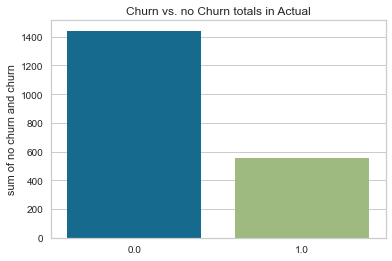

In [13]:
sns.countplot(x=y_test,data=df)
plt.ylabel('sum of no churn and churn')
plt.title('Churn vs. no Churn totals in Actual')
plt.show()

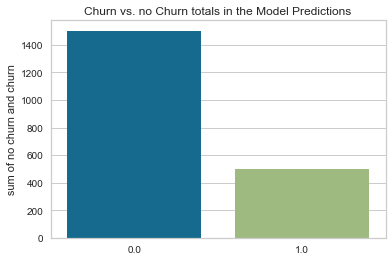

In [14]:
sns.countplot(x=y_test_pred,data=df)
plt.ylabel('sum of no churn and churn')
plt.title('Churn vs. no Churn totals in the Model Predictions')
plt.show()

In [15]:
#Source (Churn prediction fundamentals: Python)
#Precision is the % true positive / sum of all positive
#Recall is the % true positive/ sum of true positive and false negative
train_prec=round(precision_score(y_train,y_train_pred),2)
test_prec=round(precision_score(y_test,y_test_pred),2)
train_recall=round(recall_score(y_train,y_train_pred),2)
test_recall=round(recall_score(y_test,y_test_pred),2)
print('Training Precision: {}, Training recall: {}'.format(train_prec,train_recall))
print('Test Precision: {}, Test recall: {}'.format(test_prec,test_recall))

Training Precision: 0.72, Training recall: 0.63
Test Precision: 0.73, Test recall: 0.65


In [16]:
#Source (Train/Test Split + Fit/Predict/Accuracy)
#calculate metrics to evaluate algorithm by creating a confusion matrix for the initial model
print(confusion_matrix(y_test, y_test_pred))
cm=confusion_matrix(y_test,y_test_pred) 

[[1307  135]
 [ 195  363]]


In [17]:
#Source (Train/Test Split + Fit/Predict/Accuracy)
#create a classification report which shows the metrics that can be used to show how well the model performed.
print(classification_report(y_test, y_test_pred)) 

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1442
         1.0       0.73      0.65      0.69       558

    accuracy                           0.83      2000
   macro avg       0.80      0.78      0.79      2000
weighted avg       0.83      0.83      0.83      2000



In [18]:
#Find the intercept and coefficients of the initial dataset
print('intercept:', logreg.intercept_)
print('coefficient:', logreg.coef_[0])
 

intercept: [-0.02566998]
coefficient: [-2.64033007e-02  1.10452070e-03 -1.64753723e-06 -5.25536981e-02
 -2.35892151e-02 -8.12899132e-02 -9.60041229e-02 -1.38912259e-02
 -1.24657382e-02 -3.60084259e-02 -1.82201350e-02 -1.57518447e-02
  4.23400219e-02  2.40506929e-03  3.25683119e-03  3.91835664e-03
 -1.03659690e-02 -1.37096544e-02 -1.51383351e-02  3.40765471e-02
 -7.46714480e-02 -1.43067750e-02 -9.96746711e-03 -2.46198838e-01
  2.18681240e-02  2.06213667e-03 -6.71129480e-02 -6.66023909e-02
 -6.73219071e-02 -8.33306197e-02 -1.01514595e-01 -5.85584800e-02
 -6.66045854e-02 -6.68441532e-02]


In [19]:
#source  (Mokhtar EbrahimFounder of LikeGeeks., Python correlation matrix tutorial 2020)
#remove variables with a correlation > .9
corr = df.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
data = df[selected_columns]
df.shape

(10000, 35)

In [20]:
#source (Multicollinearity in Data 2020)
#Calculate the VIF (variance inflation factors) which is directly related to Rsquare. 
#VIF's over 5 should be examined for suspected multicollinearity. 
#The following code removes our dependent variable Churn, calculates the VIF for the independent variables and removes those that have a VIF over 10.
Y = data["Churn"]
iv = data.columns
iv = iv.delete(0)
X = data[iv]
 
[vif(data[iv].values, index) for index in range(len(iv))] 
 
for i in range(len(iv)):
    vif_list = [vif(data[iv].values, index) for index in range(len(iv))] 
    maxvif = max(vif_list)
    drop_index = vif_list.index(maxvif)
   
    if maxvif > 12:
        iv = iv.delete(drop_index)
# print("Final Independent_variables ", iv)

In [21]:
#filter variables to those with a VFI under 12 
df=df[['Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Contacts', 'Yearly_equip_failure', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'Item3', 'Item4', 'Item5']]
df.shape

(10000, 26)

In [22]:
#Source (Sigma Coding)
#View the statistical information about the variables and include the rows to show if the variables have values that may be considered outliers(+/-3 stddev)
desc_df = df.describe()
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)
#display(desc_df)

In [23]:
#Source (Sigma Coding)
# filter the data frame to remove the values exceeding 3 standard deviations and then view what was removed
dfr = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
dfr.index.difference(dfr.index)

Int64Index([], dtype='int64')

In [24]:
df = dfr.dropna().reset_index(drop=True)
df.shape

(8649, 26)

In [25]:
#Source (Train/Test Split + Fit/Predict/Accuracy)
# Create arrays for the features and the response variable using the reduced dataset
y = df['Churn'].values
x = df.drop('Churn', axis=1).values

# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6919, 25) (1730, 25) (6919,) (1730,)


In [26]:
#Source(Churn prediction fundamentals: Python)
# Make an instance of the model/initiate the model using the reduced dataset
logreg=LogisticRegression(random_state = 0,solver = 'liblinear') 
#Fits the data/learning how to predict churn from IVs
logreg.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [27]:
#Source(Churn prediction fundamentals: Python)
#Accuracy is the % of correctly predicted labels (churn yes and churn no) of the reduced dataset
y_train_pred=logreg.predict(x_train)
y_test_pred=logreg.predict(x_test)
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print('Training Accuracy:',round(train_acc,2))
print('Test Accuracy:',round(test_acc,4))

Training Accuracy: 0.75
Test Accuracy: 0.7775


In [28]:
print(y_test.shape,y_test_pred.shape)
 

(1730,) (1730,)


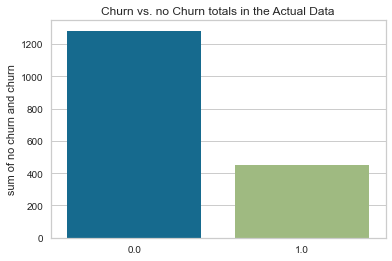

In [29]:
sns.countplot(x=y_test,data=df)
plt.ylabel('sum of no churn and churn')
plt.title('Churn vs. no Churn totals in the Actual Data')
plt.show()
 

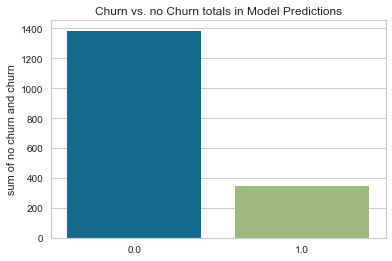

In [30]:
sns.countplot(x=y_test_pred,data=df)
plt.ylabel('sum of no churn and churn')
plt.title('Churn vs. no Churn totals in Model Predictions')
plt.show()
 

In [31]:
 print(y_test.sum(), y_test_pred.sum())
 # in original model 558.0 498.0

448.0 345.0


In [32]:
#Source(Churn prediction fundamentals: Python) used to evaluate the reduced dataset
#Precision is the % true positive / sum of all positive
#Recall is the % true positive/ sum of true positive and false negative
train_prec=round(precision_score(y_train,y_train_pred),2)
test_prec=round(precision_score(y_test,y_test_pred),2)
train_recall=round(recall_score(y_train,y_train_pred),2)
test_recall=round(recall_score(y_test,y_test_pred),2)
print('Training Precision: {}, Training recall: {}'.format(train_prec,train_recall))
print('Test Precision: {}, Test recall: {}'.format(test_prec,test_recall))


Training Precision: 0.53, Training recall: 0.4
Test Precision: 0.59, Test recall: 0.46


In [33]:
#Source (Train/Test Split + Fit/Predict/Accuracy)
#calculate metrics to evaluate algorithm by creating a confusion matrix
print(confusion_matrix(y_test, y_test_pred))
cm=confusion_matrix(y_test,y_test_pred) 

[[1141  141]
 [ 244  204]]


In [34]:
#Source (Train/Test Split + Fit/Predict/Accuracy)
#create a classification report which shows the metrics that can be used to show how well the model performed.
print(classification_report(y_test, y_test_pred)) 

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86      1282
         1.0       0.59      0.46      0.51       448

    accuracy                           0.78      1730
   macro avg       0.71      0.67      0.69      1730
weighted avg       0.76      0.78      0.77      1730



In [35]:
#Find the intercept and coefficients of the reduced dataset
print('intercept:', logreg.intercept_)
print('coefficient:', logreg.coef_[0])

intercept: [0.00083633]
coefficient: [ 4.26735047e-03 -9.52012194e-08 -1.88268863e-03 -1.09899584e-03
  9.28124783e-03  1.51585491e-03 -4.08203484e-04 -1.44265508e-03
 -2.91415307e-04  5.43580797e-04  2.64580427e-03  0.00000000e+00
  8.44603328e-03  1.42730558e-03 -3.46012117e-03  2.75859252e-03
  2.05414327e-03  1.50842872e-02 -1.75240341e-02  2.83993300e-04
  5.12985768e-03 -5.45017003e-02  1.10826549e-03  3.74381754e-03
  2.60996072e-03]


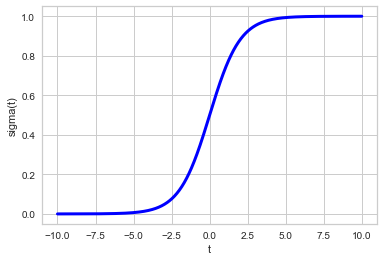

In [36]:
# Source (uCertify)
#Plot the sigmoid function for the reduced dataset
def model(logreg):
    return 1 / (1 + np.exp(-logreg))

logreg_vals = np.linspace(-10, 10, 1000)
plt.plot(logreg_vals, model(logreg_vals), color='blue', linewidth=3)
plt.ylabel('sigma(t)')
plt.xlabel('t')

plt.show()

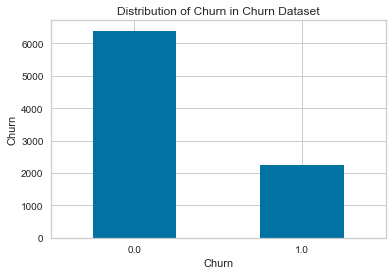

In [37]:
#Boxplot showing distribution of churn
df.groupby('Churn').size().plot.bar(rot=0)
plt.ylabel('Churn')
plt.title('Distribution of Churn in Churn Dataset')
plt.show()

<AxesSubplot:xlabel='Churn'>

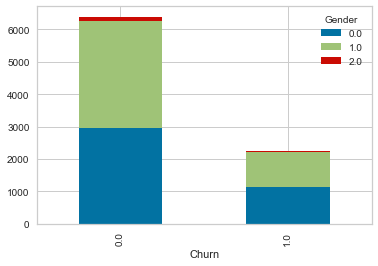

In [38]:
#Stacked boxplot
tbl = pd.pivot_table(df.groupby(['Churn','Gender']).size().reset_index(),
values=0,
index='Churn',
columns=['Gender'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)

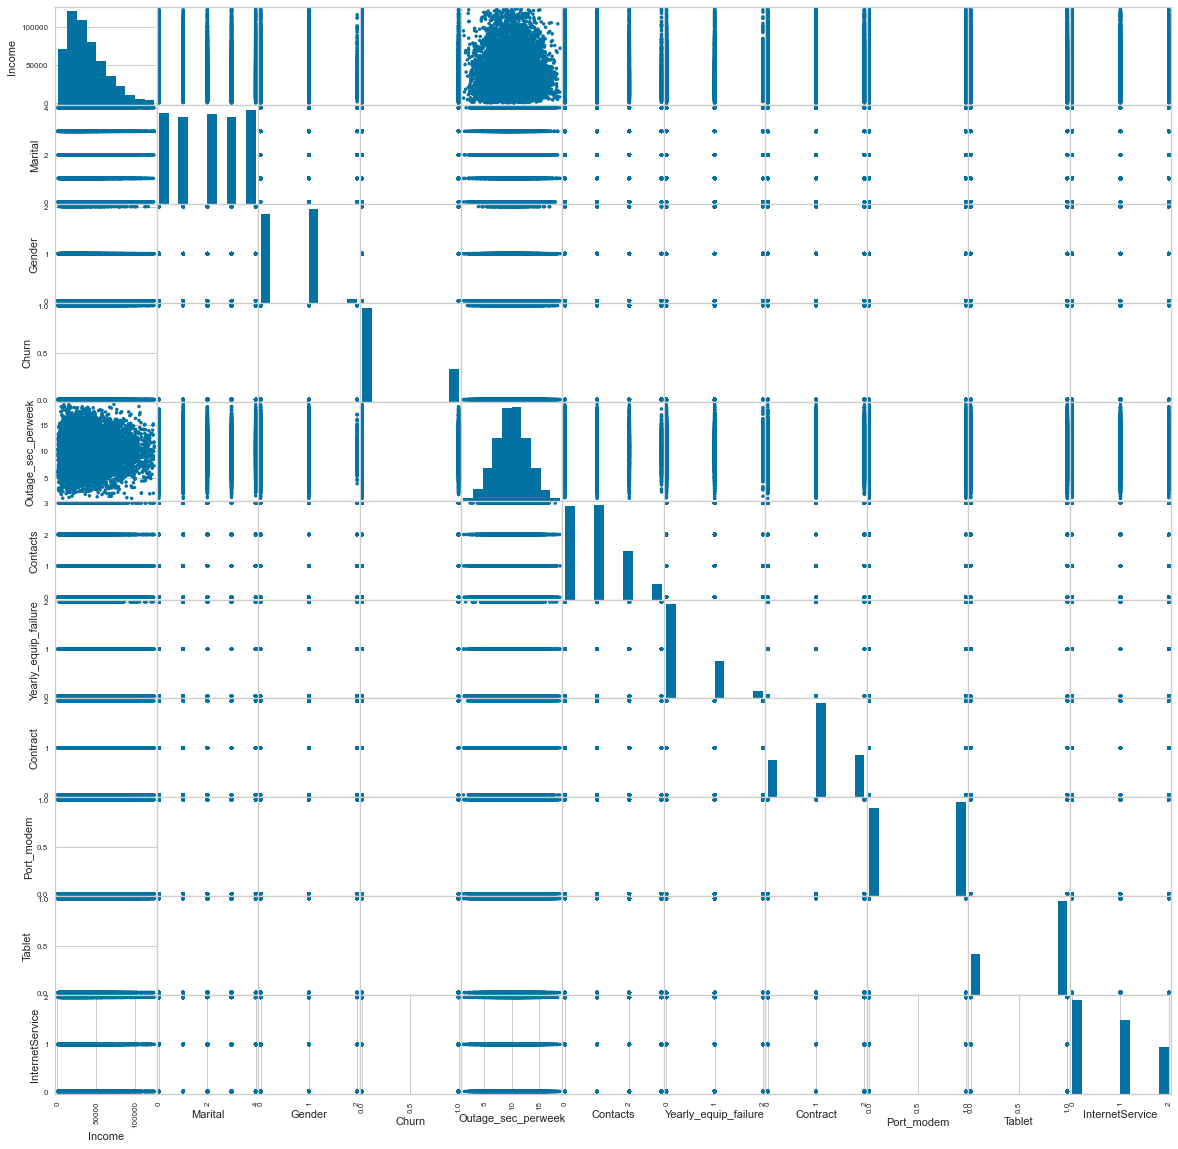

In [40]:
#create scatterplots for the first 1/2 of variables in the reduced dataset
pd.plotting.scatter_matrix(df.iloc[:, 1:12], alpha = 1, figsize = (20, 20))
plt.show()
 

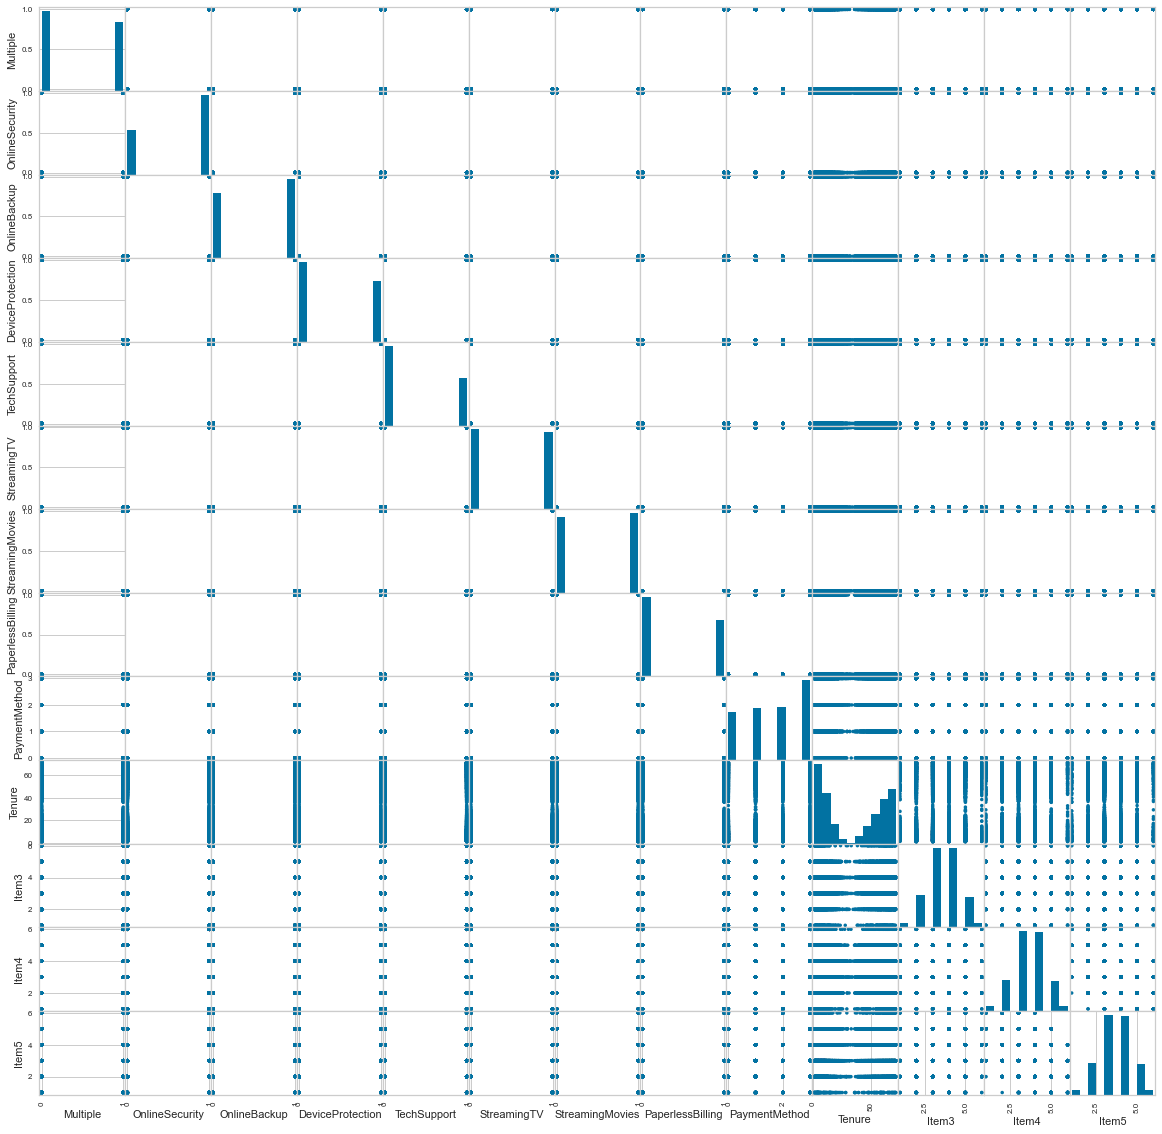

In [41]:
#create scatterplots for the first 1/2 of variables in the reduced dataset
pd.plotting.scatter_matrix(df.iloc[:, 13:], alpha = 1, figsize = (20, 20))
plt.show()